# Лабораторная работa 1. Введение в NLP

#### Работу выполнил: `{впишите вашу фамилию}` `{впишите ваше имя}`, студент группы ФИб-4

Вспомните возможности языка python на основе материалов курса "Основы python" хэндбука от `Yandex`- [ссылка](https://education.yandex.ru/handbook/python).

Особенно обратите внимание на темы:
- 3.1 Строки, кортежи, списки
- 3.2 Множества, словари
- 4.2 Позиционные и именованные аргументы. Функции высших порядков. Лямбда-функции
- 4.3 Рекурсия. Декораторы. Генераторы
- 6.1 Модули `math` и `numpy`
- 6.2 Модуль `pandas`

Для обработки текстов на русском языке можно использовать модуль 'Natasha` (руководство - [статья на Хабр](https://habr.com/ru/articles/516098/)).

### Краткое руководство модуля Natasha
#### Импорт библиотек и создание объекта для работы с текстом
Импортируйте библиотеки для сегментации на предложения, морфологического и синтаксического анализа.

```python
from natasha import(
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    Doc,
)
```

Создайте объект из обрабатываемого текста `text`:

```python
text_doc = Doc(text)
```

#### Сегментация на предложения
Создайте объект, который будет выполнять сегментацию текста на предложения:

```python
segmenter = Segmenter()
```

С помощью сегментатора можно разбить текст на предложения и токены:

```python
text_doc.segment(segmenter)
print(text_doc.tokens)
print(text_doc.sents)
```

#### Морфологический анализ

Инициализируйте словарь и морфологический анализатор:
```python
morph_vocab = MorphVocab()
morph_tagger = NewsMorphTagger(emb)
```

Чтобы получить морфологическую разметку слова `word` воспользуйтесь:

```python
morph_vocab.parse(word)
```

Добавить морфологическую разметку к объекту обрабатываемого текста (Doc) можно как

```python
text_doc.tag_morph(morph_tagger)
print(text_doc.tokens)
text_doc.sents[0].morph.print()
```

**Лемматизаиця** - приведение словоформы начальной форме слова.
Получить леммы текста можно через метод `lemmatize`:

```python
for token in text_doc.tokens:
    token.lemmatize(morph_vocab)
{_.text: _.lemma for _ in text_doc.tokens}
```

## Часть 1. Анализ текстового корпуса

*Задание 1.1*

Загрузите в `pandas` датафрейм новостной датасет [`lenta_ru_news_filtered.csv`](https://drive.google.com/file/d/16pyL2sgbsFsyuMpB_tpE3w9OLcumtVFN/view?usp=sharing), собранный на базе корпуса `lenta.ru_v1.0`. В датасете каждая новость описывается следующими полями:

- **url** - адрес новости на сайте lenta.ru,
- **topic** - тема новости,
- **title** - заголовок новости,
- **text** - текст новости.

Ответьте на следуюшие вопросы:

- Сколько всего новостных текстов в датасете?
- На какие темы встречаются новости?
- Сколько новостных текстов по каждой из тем?

In [9]:
import pandas as pd

# Загружаем данные
df = pd.read_csv('/content/sample_data/lenta_ru_news_filtered.csv')

# 1. Сколько всего новостных текстов в датасете?
total_news = len(df)
print(f"Всего новостных текстов в датасете: {total_news}")

# 2. На какие темы встречаются новости?
unique_topics = df['topic'].unique()
print(f"\nУникальные темы новостей ({len(unique_topics)}):")
for i, topic in enumerate(unique_topics, 1):
    print(f"{i}. {topic}")

# 3. Сколько новостных текстов по каждой из тем?
news_per_topic = df['topic'].value_counts()
print(f"\nКоличество новостей по каждой теме:")

Всего новостных текстов в датасете: 4000

Уникальные темы новостей (2):
1. Культура
2. Экономика

Количество новостей по каждой теме:
topic
Культура     2000
Экономика    2000
Name: count, dtype: int64


*Задание 1.2*

Постройте гистограмму распределения длин в **символах** текстов новостного корпуса.

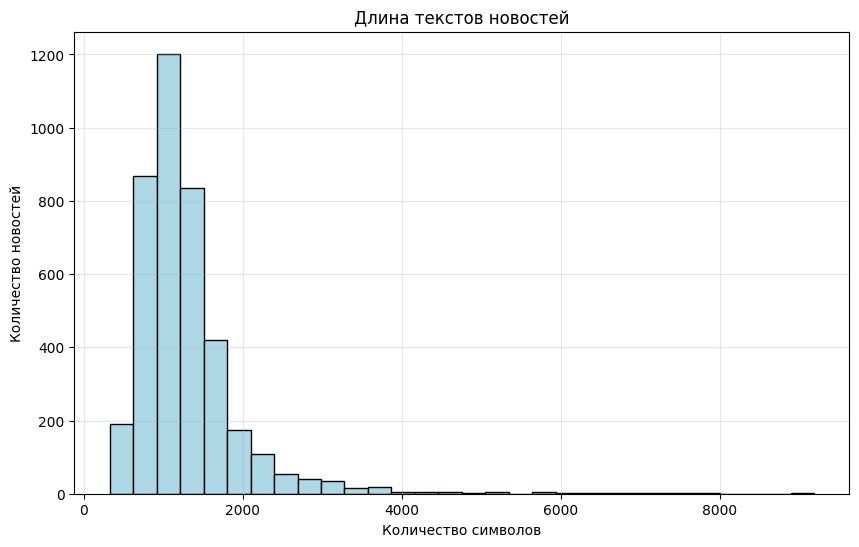

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/lenta_ru_news_filtered.csv')

# Считаем длину каждого текста
df['длина_текста'] = df['text'].str.len()

# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(df['длина_текста'], bins=30, color='lightblue', edgecolor='black')
plt.title('Длина текстов новостей')
plt.xlabel('Количество символов')
plt.ylabel('Количество новостей')
plt.grid(True, alpha=0.3)
plt.show()

*Задание 1.3*

Постройте гистограмму распределения длин в **словах** текстов новостного корпуса.

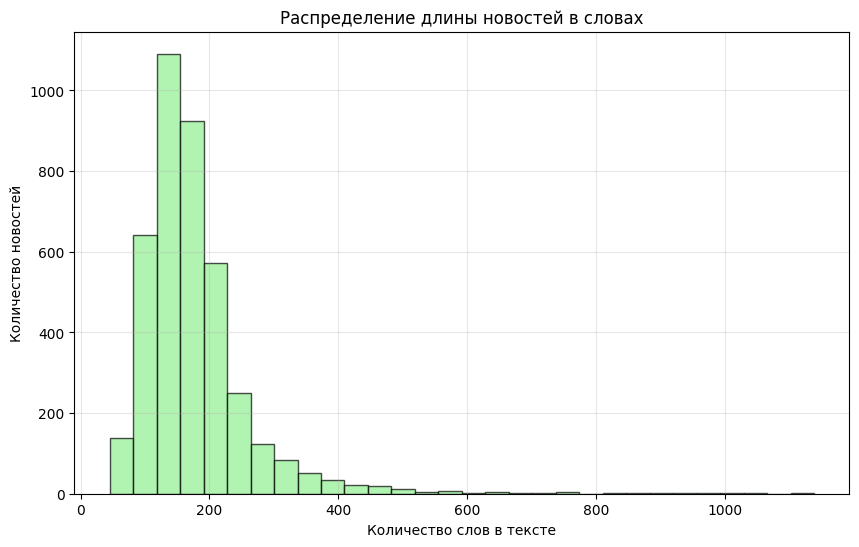

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/lenta_ru_news_filtered.csv')

# Считаем количество слов в каждом тексте
# Разделяем по пробелам и считаем количество элементов
df['количество_слов'] = df['text'].apply(lambda x: len(str(x).split()))

# Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(df['количество_слов'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Распределение длины новостей в словах')
plt.xlabel('Количество слов в тексте')
plt.ylabel('Количество новостей')
plt.grid(True, alpha=0.3)
plt.show()

*Задание 1.4*

Постройте гистограмму распределения длин слов, встречающихся в новостных текстах. Какова максимальная и минимальная длины слов?

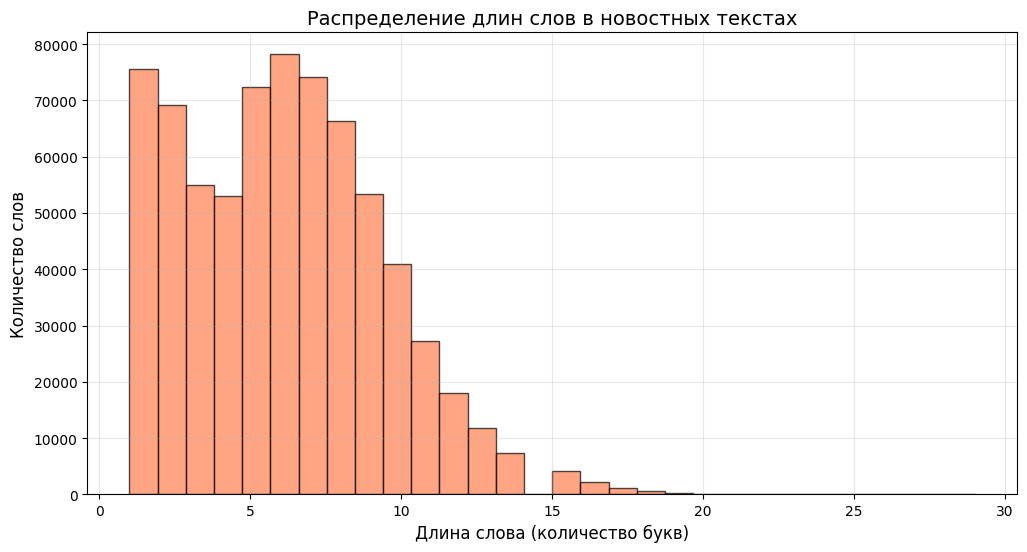

=== СТАТИСТИКА ДЛИН СЛОВ ===
Минимальная длина слова: 1 букв
Максимальная длина слова: 29 букв

=== ПРИМЕРЫ СЛОВ ===
Самые короткие слова (1 буква): {'о', 'у', 'и', 'в'}
Самые длинные слова (29 букв): {'maikhaodreamvillaresortandspa'}


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Загружаем данные
df = pd.read_csv('/content/sample_data/lenta_ru_news_filtered.csv')

# Собираем все слова из всех текстов
all_words = []
for text in df['text'].dropna():
    # Разделяем текст на слова (убираем знаки препинания)
    words = re.findall(r'\b\w+\b', str(text).lower())
    all_words.extend(words)

# Создаем Series с длинами слов
word_lengths = pd.Series([len(word) for word in all_words])

# Создаем гистограмму
plt.figure(figsize=(12, 6))
plt.hist(word_lengths, bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.title('Распределение длин слов в новостных текстах', fontsize=14)
plt.xlabel('Длина слова (количество букв)', fontsize=12)
plt.ylabel('Количество слов', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Выводим статистику
print("=== СТАТИСТИКА ДЛИН СЛОВ ===")
print(f"Минимальная длина слова: {word_lengths.min()} букв")
print(f"Максимальная длина слова: {word_lengths.max()} букв")

print("\n=== ПРИМЕРЫ СЛОВ ===")
# Слова минимальной длины
min_length = word_lengths.min()
short_words = [word for word in all_words if len(word) == min_length]
print(f"Самые короткие слова ({min_length} буква): {set(short_words[:10])}")

# Слова максимальной длины
max_length = word_lengths.max()
long_words = [word for word in all_words if len(word) == max_length]
print(f"Самые длинные слова ({max_length} букв): {set(long_words[:10])}")

*Задание 1.5*

Сделайте лемматизиацию новостных текстов и сохраните полученные тексты, например в новый столбец датафрейма с датасетом(они пригодятся в части 3 этой лабораторной работы).

!!! Заметьте, что в `pandas` можно сохранять датафрейм в файл (файл из `colab` можно скачать из раздела `Files`). Это удобно, чтобы исключить повторную обработку при перезапуске сессии в `colab`.

In [15]:
import pandas as pd
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)

# Загрузка данных
df = pd.read_csv('/content/sample_data/lenta_ru_news_filtered.csv')

# Инициализация Natasha
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
morph_vocab = MorphVocab()

def lemmatize_with_natasha(text):
    if pd.isna(text):
        return ''

    doc = Doc(str(text))
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    for token in doc.tokens:
        token.lemmatize(morph_vocab)

    # Собираем лемматизированный текст
    lemmas = [token.lemma for token in doc.tokens]
    return ' '.join(lemmas)

# Применяем лемматизацию
print("Лемматизация с Natasha")
df['text_lemmatized'] = df['text'].apply(lemmatize_with_natasha)

# Сохранение
df.to_csv('/content/sample_data/lenta_natasha_lemmatized.csv', index=False, encoding='utf-8')

Лемматизация с Natasha


## Часть 2. Регулярные выражения в обработке тектов

**Полезные ссылки**: <a href=https://habr.com/ru/articles/349860/>cтатья на Хабре про регулярные выражения </a> и <a href=https://regex101.com/>помощник для составления регулярных выражений</a>

**Тексты для тестирования** выполнения заданий на регулярные выражения:

А) Приветствуем вас в нашем туристическом агентстве! Мы готовы предложить вам незабываемые путешествия в различные уголки мира.  Наша команда профессионалов всегда готова помочь вам с выбором лучшего маршрута, который будет соответствовать вашим предпочтениям и бюджету. Мы предлагаем широкий выбор туров, от пляжного отдыха до экстремальных приключений. Для связи с нами вы можете использовать следующие адреса электронной почты: info@touragency.com, support@touragency.com или sales@touragency.com. Наши менеджеры - это опытные специалисты, которые знают все тонкости организации путешествий. Мы работаем с лучшими отелями и авиакомпаниями, чтобы обеспечить вам максимальный комфорт и безопасность во время вашего отдыха. Не упустите возможность отправиться в незабываемое путешествие с нашей помощью! Свяжитесь с нами по одному из указанных адресов электронной почты или позвоните по телефону 8(495)123-45-67

Б) Мы предлагаем туры в город Париж, город Рим, город Барселона и город Лондон. Каждый из этих городов имеет свою уникальную атмосферу и достопримечательности, которые стоит увидеть своими глазами. Мы также предлагаем индивидуальные туры, которые будут разработаны специально для вас. Вы можете выбрать любой город или страну, которую вы хотите посетить, и мы организуем для вас незабываемое путешествие. Пишите нам по адресу: г. Киров, ул. Труда, д. 105, оф. 110

В) Бот должен решать арифметические задачи, например, 2+3 или 145-80*(10-12), и правильно выдавать ответ. Хотелось бы повести соревнование на скорость, кто быстрее будет считать такие примеры как 105-10*2 - написанный вами бот или школьник.

Г) Заказ пришёл на следующие произведения: Агата Кристи "Эркюль Пуаро", Пушкин А.С. "Евгений Онегин" и Хорхе Луи Борхес "Сад расходящихся троп".

Д) Попробуйте почитать статьи на эту тему. Например, вам помогут статьи Subhabrata Mukherjee Et Al "Orca: Progressive Learning from Complex Explanation Traces of GPT-4" и Arindam Mitra Et Al "Orca 2: Teaching Small Language Models How to Reason". Также смотрите руководство на сайте "Huggingface".

Е) Осторожно! С этого номера 88007777777 постояно звонят мошенники. Будьте бдительны. Моему товарищу уже поступило 8 звонков от них. Телефон тех.поддержки 8-929-100-20-33 или 8(8334)65-67-98.

*Задание 2.1*<br>
Напишите функцию, которая принимает текст и извлекает из него адреса электоронной почты в виде списка. Для тестирования используйте текст А и аналогичные ему тексты.

In [ ]:
# ваш код

*Задание 2.2a*

Напишите функцию, которая принимает текст и извлекает из него названия городов, если в тексте перед названием встречается `г.` или `город`. Для тестирования используйте текст Б и аналогичные ему тексты.

In [ ]:
# ваш код

*Задание 2.2b*

Приведите примеры текстов двух **разных** "сложных" случаев, когда используемый вами подход к выделению названия города, описанный в задании, отработает неправильно.

In [ ]:
# ваши примеры

*Задание 2.3*<br>
Напишите функцию, которая принимает текст и извлекает из него все арифметические выражения в виде списка. Для тестирования используйте текст В и аналогичные ему тексты.

In [ ]:
# ваш код

*Задание 2.4*

Напишите функцию, которая принимает текст и извлекает из него фамилию и имя/инициалы автора/ов (написаны с большой буквы) книги или статьи, которая заключена в кавычках. Функция должна работать для русскоязычных и англоязычных текстов. Для тестирования используйте тексты Г, Д и аналогичные им тексты.

In [ ]:
# ваш код

*Задание 2.5*<br>
Напишите функцию, которая принимает текст и извлекает из него предложения (оканчиваются `.`, `!` или `?`), в которых встречаются года, записанные в виде четырёх чисел в диапазоне от 1900 до 2025, например 1996.

In [ ]:
# ваш код

*Задание 2.6*<br>
Напишите функцию, которая принимает текст и меняет его, заменив в номерах телефонах префикс с 8... на +7. Для тестирования используйте текст Е и аналогичные ему тексты.

In [ ]:
# ваш код

## Часть 3. Извлечение именнованных сущностей из текстов на основе регулярных выражений

*Задание 3.1*

Используя регулярные выражения, извлеките из лемматизированных новостных текстов датасета `lenta_ru_news_filtered.csv` (см. часть 1) именнованные сущности `ПЕРСОНА`, которые встречаются в тексте как <Фамилия Имя> или <Фамилия Инициалы>. Подсчитайте сколько раз встречается каждая и выведите топ-10 наиболее часто встречающихся. Проанализируйте результаты, сделайте выводы об ошибочно извлечённых результатах.

In [ ]:
# ваш код

*Задание 3.2*

Используя регулярные выражения, извлеките из лемматизированных новостных текстов датасета `lenta_ru_news_filtered.csv` (см. часть 1) именнованные сущности "ГОД". Подсчитайте сколько раз встречается каждая и выведите топ-10 наиболее часто встречающихся. Сделайте вывод по поводу преобладающего временного периода,которые освещают новостные тексты.

In [ ]:
# ваш код